# Loan Aproval Prediction Using Classification Machine Learning

## Introduction

### This project aims to predict whether a loan will be approved based on independent variables such as client income, years employed, gender, and credit score, with the dependent variable being the loan approval decision. The project follows a structured machine learning pipeline that includes loading, data cleansing, and preprocessing the dataset, training multiple models, and evaluating their performance. To achieve accurate and reliable results, various machine learning algorithms such as Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Decision Tree Classifier (DTC) are applied.

### In addition to model training, the performance of each model is evaluated using multiple metrics  including Accuracy Score, Precision Score, and Recall Score  to provide a comprehensive assessment of prediction quality. These evaluation metrics ensure that the model not only predicts correctly but also maintains a balance between identifying approved and unapproved loans. Through this approach, the project seeks to identify the most effective model for predicting loan approval outcomes based on client characteristics.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load The Loan Aproval Dataset

In [2]:
loan = pd.read_excel(r"Downloads\\loan_approval_datasets_dirty.xlsx")
loan.head()

,name,city,income,credit_score,loan_amount,years_employed,points,gender,loan_approved
0,Allison Hill,East Jill,113810.0,389.0,39698,27,50,male,False
1,Brandon Hall,New Jamesside,44592.0,729.0,15446,28,55,FEMALE,False
2,NaN,Lake Roberto,NaN,584.0,11189,13,45,male,False
3,Gabrielle Davis,NaN,127196.0,NaN,48823,29,50,male,False
4,Valerie Gray,Mariastad,6604800.0,496.0,47174,4,25,male,False


### Data Cleansing

In [4]:
# Checking Nulls In the dataset
loan.isnull().sum()

name              200
city              188
income            201
credit_score      100
loan_amount         0
years_employed      0
points              0
gender              0
loan_approved       0
dtype: int64

In [5]:
#Delating Nulls in the Dataset
loan=loan.dropna()

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 2004
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1407 non-null   object 
 1   city            1407 non-null   object 
 2   income          1407 non-null   float64
 3   credit_score    1407 non-null   float64
 4   loan_amount     1407 non-null   int64  
 5   years_employed  1407 non-null   int64  
 6   points          1407 non-null   int64  
 7   gender          1407 non-null   object 
 8   loan_approved   1407 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 100.3+ KB


In [7]:
loan.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
gender            0
loan_approved     0
dtype: int64

### Statistical Analysis 

In [8]:
loan['gender'].value_counts()

gender
male      715
FEMALE    692
Name: count, dtype: int64

In [9]:
loan['gender'] = loan['gender'].astype('str')

In [10]:
loan['gender'] = loan['gender'].str.upper()

In [11]:
loan['loan_approved'] = loan['loan_approved'].astype('str')

In [12]:
loan['loan_approved'] = loan['loan_approved'].str.lower()

In [13]:
loan.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
gender            0
loan_approved     0
dtype: int64

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 2004
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1407 non-null   object 
 1   city            1407 non-null   object 
 2   income          1407 non-null   float64
 3   credit_score    1407 non-null   float64
 4   loan_amount     1407 non-null   int64  
 5   years_employed  1407 non-null   int64  
 6   points          1407 non-null   int64  
 7   gender          1407 non-null   object 
 8   loan_approved   1407 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 109.9+ KB


In [15]:
loan.describe()

,income,credit_score,loan_amount,years_employed,points
count,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000
mean,2.626388e+05,571.967306,25313.235963,20.557925,56.520967
std,1.338294e+06,161.207708,14310.262210,11.897172,18.637729
min,3.005300e+04,300.000000,1022.000000,0.000000,10.000000
25%,6.129250e+04,429.000000,12667.500000,10.000000,45.000000
50%,9.091000e+04,573.000000,25594.000000,21.000000,55.000000
75%,1.210635e+05,713.500000,37629.500000,31.000000,70.000000
max,1.452470e+07,850.000000,49999.000000,40.000000,100.000000


In [22]:
# Loans Aproved per Gender 
Approved = loan.groupby('gender') ['loan_approved'].value_counts()
Approved

gender  loan_approved
FEMALE  false            394
        true             298
MALE    false            402
        true             313
Name: count, dtype: int64

In [23]:
loan['loan_approved'].value_counts()

loan_approved
false    796
true     611
Name: count, dtype: int64

### Data Visualization

### Gender Distribution Graphy

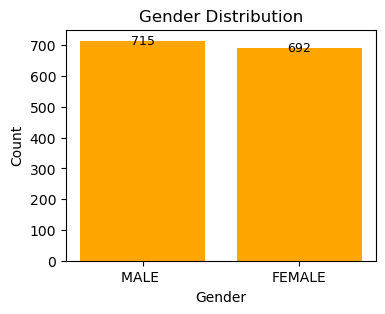

In [24]:
gender_counts = loan['gender'].value_counts()

plt.figure(figsize=(4,3))
bars = plt.bar(gender_counts.index, gender_counts.values, color='orange')

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='center', fontsize=9, color='black')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


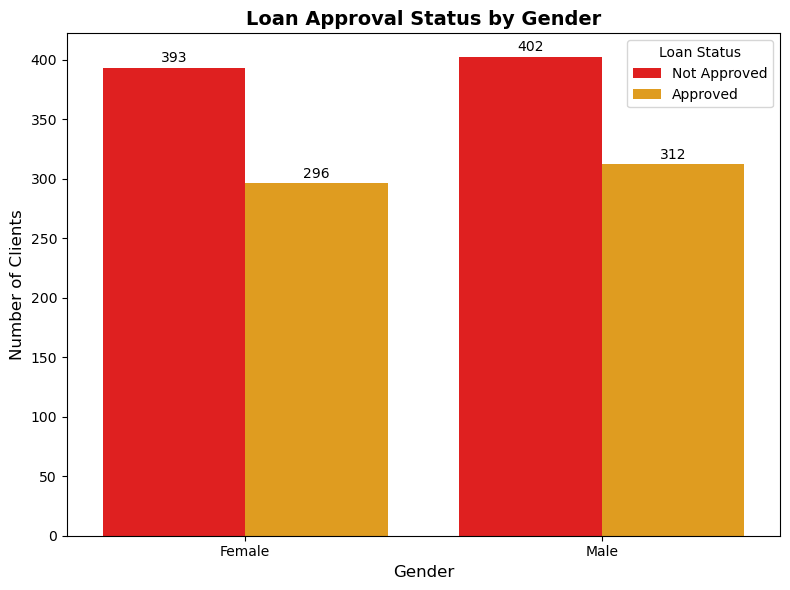

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Approved = loan.groupby(['gender', 'loan_approved']).size().reset_index(name='count')
Approved['gender'] = Approved['gender'].map({0: 'Female', 1: 'Male'})
Approved['loan_approved'] = Approved['loan_approved'].map({0: 'Not Approved', 1: 'Approved'})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='count', hue='loan_approved', data=Approved, palette=['red', 'orange'])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=2)

# Chart formatting
plt.title('Loan Approval Status by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


### Top Ten Clients With Highest Income

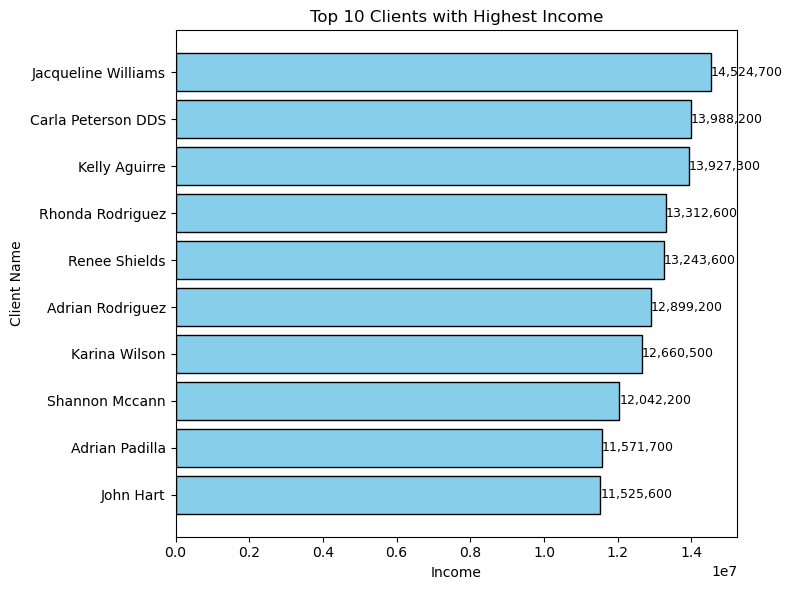

In [29]:
top10 = loan.sort_values(by='income', ascending=False).head(10)
plt.figure(figsize=(8,6))
bars = plt.barh(top10['name'], top10['income'], color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.title('Top 10 Clients with Highest Income')
plt.xlabel('Income')
plt.ylabel('Client Name')
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()


### Top 5 Cities with Highest Number of Clients

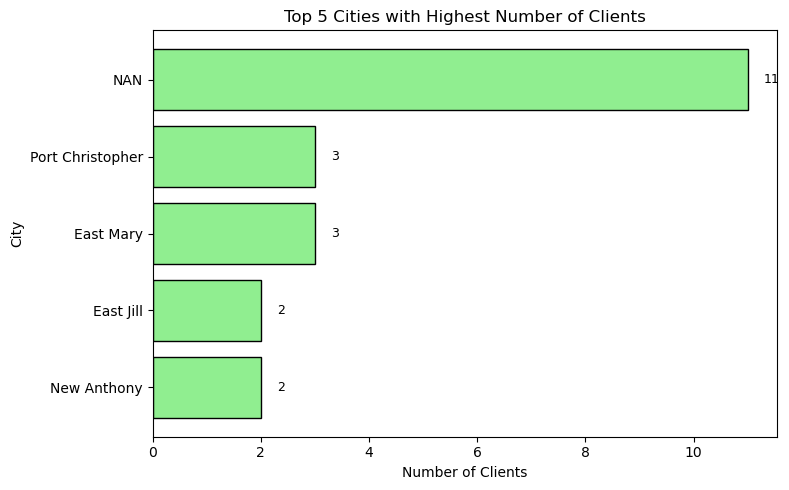

In [30]:
city_counts = loan['city'].value_counts().head(5)
plt.figure(figsize=(8,5))
bars = plt.barh(city_counts.index, city_counts.values, color='lightgreen', edgecolor='black')
plt.gca().invert_yaxis()
plt.title('Top 5 Cities with Highest Number of Clients')
plt.xlabel('Number of Clients')
plt.ylabel('City')
for i, value in enumerate(city_counts.values):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()


In [32]:
loan.head()

,name,city,income,credit_score,loan_amount,years_employed,points,gender,loan_approved
0,Allison Hill,East Jill,113810.0,389.0,39698,27,50,MALE,false
1,Brandon Hall,New Jamesside,44592.0,729.0,15446,28,55,FEMALE,false
4,Valerie Gray,Mariastad,6604800.0,496.0,47174,4,25,MALE,false
5,Darren Roberts,Port Jesseville,62098.0,689.0,19217,29,65,FEMALE,true
6,Holly Wood,Lake Joseph,59256.0,373.0,40920,40,35,MALE,false


### Data Preprocessing 

In [33]:
loan['gender'] = loan['gender'].map({'FEMALE':0, 'MALE':1}) 
loan['gender'] = loan['gender'].fillna(1)
loan['gender'] = loan['gender'].astype('int64')

In [34]:
loan['loan_approved'] = loan['loan_approved'].map({'false':0, 'true':1})

In [36]:
loan = loan.drop_duplicates()

## Model Training 

### Select variables

In [37]:
x=loan[['income', 'credit_score', 'loan_amount', 'years_employed', 'gender']]
y= loan['loan_approved']

### Spliting the dataset into Training And Testing dataset, and train size= 80%

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### Normilasation 

In [39]:
from sklearn.preprocessing import StandardScaler
normalize = StandardScaler()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)

### Support Vector Machine(SVM)

In [40]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

### K-Nearest Neighbors(KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier( n_neighbors = 33)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

### Decision Tree Classifier(DTC)

In [42]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

### Make Predictions

In [43]:
SVM_predict = SVM.predict(x_test)
KNN_predict = KNN.predict(x_test)
DTC_predict = DTC.predict(x_test)

## Models Evaluation Using 3 Metrics

#### 1. Accuracy Score Mertic

In [56]:
from sklearn.metrics import accuracy_score
SVM_Accuracy_Score = accuracy_score(y_test, SVM_predict)
KNN_Accuracy_Score = accuracy_score(y_test, KNN_predict)
DTC_Accuracy_Score = accuracy_score(y_test, DTC_predict)

In [73]:
print(f'The Accuracy Score for SVM is: {SVM_Accuracy_Score}')
print(f'The Accuracy Score for KNN is: {KNN_Accuracy_Score}')
print(f'The Accuracy Score for DTC is: {DTC_Accuracy_Score}')

The Accuracy Score for SVM is: 0.8896797153024911
The Accuracy Score for KNN is: 0.8790035587188612
The Accuracy Score for DTC is: 0.9572953736654805


#### 2. Precision Score Metric

In [69]:
from sklearn.metrics import precision_score
SVM_precision_Score = precision_score(y_test, SVM_predict)
KNN_precision_Score = precision_score(y_test, KNN_predict)
DTC_precision_Score = precision_score(y_test, DTC_predict)

In [70]:
print(f'The Precision Score for SVM is: {SVM_precision_Score}')
print(f'The Precision Score for KNN is: {KNN_precision_Score}')
print(f'The Precision Score for DTC is: {DTC_precision_Score}')

The Precision Score for SVM is: 0.8672566371681416
The Precision Score for KNN is: 0.8636363636363636
The Precision Score for DTC is: 0.9396551724137931


#### 3. Recall Score Matric

In [71]:
from sklearn.metrics import recall_score
SVM_recall_score = recall_score(y_test, SVM_predict)
KNN_recall_score = recall_score(y_test, KNN_predict)
DTC_recall_score = recall_score(y_test, DTC_predict)

In [72]:
print(f'The Recall Score for SVM is: {SVM_recall_score}')
print(f'The Recall Score for KNN is: {KNN_recall_score}')
print(f'The Recall Score for DTC is: {DTC_recall_score}')

The Recall Score for SVM is: 0.8596491228070176
The Recall Score for KNN is: 0.8333333333333334
The Recall Score for DTC is: 0.956140350877193


## Visualising the Result 

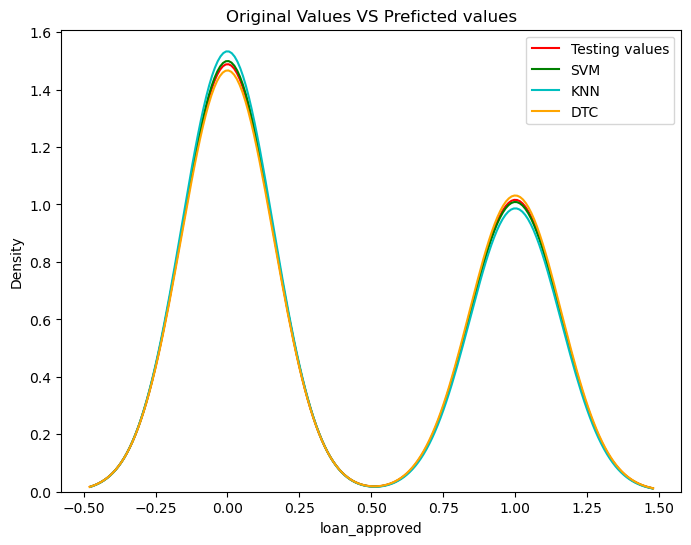

In [61]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, label='Testing values', color='r')
sns.kdeplot(SVM_predict, label='SVM', color='green')
sns.kdeplot(KNN_predict, label='KNN', color='c')
sns.kdeplot(DTC_predict, label='DTC', color='orange')
plt.title('Original Values VS Preficted values')
plt.legend()

## Conclusion

#### In conclusion, the results of the model evaluations show that the Decision Tree Classifier (DTC) is the most effective and reliable model for predicting loan approvals. With the highest accuracy of 95.7%, precision of 93.9%, and recall of 95.6%, the DTC model demonstrates excellent performance in identifying clients who are likely to have their loans approved. This strong performance suggests that the model can accurately distinguish between approved and non-approved applicants. Furthermore, the results indicate that important features such as income, credit score, loan amount, years employed, and gender play a significant role in predicting whether a person can get a loan or not. Therefore, using the Decision Tree Classifier along with these key variables provides a powerful approach for financial institutions to assess loan eligibility and make data-driven lending decisions with confidence.


#### Based on the results, we can conclude that income, credit score, loan amount, years employed, and gender are significant predictors of whether a person is likely to have their loan approved or not. The project demonstrates that machine learning can significantly enhance the accuracy and efficiency of loan approval processes by learning meaningful patterns from historical client data.

## Findings

#### The Findings revealed that the data is fair and unbiased, meaning that there is no significant bias in how loan approvals are distributed across key demographic features such as gender or income level. This fairness ensures that the model’s predictions are based on relevant financial and employment factors—specifically income, credit score, loan amount, years employed, and gender—rather than biased patterns in the data. Overall, these findings confirm that the Decision Tree Classifier, trained on a fair and balanced dataset, provides the most accurate and reliable predictions for loan approval decisions.

In [50]:
## Male = 1 Female = 0 
## Loan Approved = 1 loan_not_approved = 0
Approved = loan.groupby('gender') ['loan_approved'].value_counts()
Approved

gender  loan_approved
0       0                393
        1                296
1       0                402
        1                312
Name: count, dtype: int64

### Future Work

#### In the future, this project can be expanded and improved in several ways to enhance its predictive performance and real-world applicability. First, additional features such as education level, employment type, marital status, and existing debt could be included to provide a more comprehensive understanding of the factors influencing loan approval. Second, hyperparameter tuning and cross-validation techniques can be applied to optimize model performance and reduce overfitting, ensuring better generalization to unseen data.